# Overall Statsitical Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import os.path
from functools import reduce
import tempfile
import scipy.stats as stats
import shutil
import mlflow

In [2]:
sys.path.append('..')
from utils.kaggle import get_global_parameters, calc_contest_metric
from utils.preprocessing import encode_mean_level
from utils.mlflow_experiments import retrieve_artifacts
from utils.statistical_tests import simulate_chi_square
global_parms = get_global_parameters()

In [3]:
pd.options.display.max_rows = 1000


In [4]:
# create directory to save artifacts
tmpdir = tempfile.mkdtemp()

## Retrieve sample data for eda

In [5]:

# Run Id for sample data
RUN_ID='4ddbfd51619d4edb9c8693185038c1f4'  #20%
#RUN_ID='8300b1d2a03947b1af77563867bdc292'  #50%

tmpdir = tempfile.mkdtemp()

retrieve_artifacts(RUN_ID, '.', tmpdir)


train_samp = pd.read_pickle(os.path.join(tmpdir,'sample.pkl'))
train_samp.shape

(118108, 434)

In [6]:
train_samp = train_samp.drop(['TransactionID'],axis=1)

## Split numeric and character variables

In [7]:
char_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name == 'object']

In [8]:
num_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name != 'object']

## Dataframe for numeric perdictors

In [9]:
num_df = train_samp[num_predictors]
num_df.shape

(118108, 402)

In [10]:
def calc_pct_missing(df):
    return df.isnull().sum()/df.shape[0] * 100

def calc_overall_stats(df):
    desc = df.describe().T
    skew = pd.DataFrame(df.skew(), columns=['skew'])
    nunique = pd.DataFrame(df.nunique(), columns=['nunique'])
    pct_missing = pd.DataFrame(df.isnull().sum()/train_samp.shape[0] * 100, columns=['pct_missing']) 
    dtype = pd.DataFrame(df.dtypes, columns=['dtype'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [dtype, nunique, pct_missing, skew, desc])
    
def calc_isFraud_stats(df):
    desc = df.groupby('isFraud').describe().stack(0).swaplevel(0,1).sort_index()
    skew = pd.DataFrame(df.groupby('isFraud').skew().stack(0).swaplevel(0,1).sort_index(), columns=['skew'])
    nunique = pd.DataFrame(df.groupby('isFraud').nunique().stack(0).swaplevel(0,1).sort_index(), columns=['nunique'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [ nunique, skew, desc])[['nunique','skew', 'count', 'mean', 'std','min', '25%', '50%', '75%', 'max']]
# pct_missing,

In [11]:
numeric_stats = calc_overall_stats(num_df)
numeric_stats

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.058956,118108.0,3.501880e-02,1.838281e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
TransactionDT,int64,117427,0.000000,0.132674,118108.0,7.368210e+06,4.612972e+06,86469.000,3.023825e+06,7.278750e+06,1.123689e+07,1.581109e+07
TransactionAmt,float64,8643,0.000000,22.850611,118108.0,1.359070e+02,2.506553e+02,0.251,4.397000e+01,6.900000e+01,1.250000e+02,3.193739e+04
card1,int64,8171,0.000000,-0.036554,118108.0,9.880470e+03,4.893335e+03,1009.000,6.019000e+03,9.633000e+03,1.415300e+04,1.839500e+04
card2,float64,500,1.565516,-0.206907,116259.0,3.630303e+02,1.579998e+02,100.000,2.150000e+02,3.610000e+02,5.120000e+02,6.000000e+02
card3,float64,91,0.271785,2.080075,117787.0,1.532058e+02,1.129837e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,float64,74,0.749314,-1.241132,117223.0,1.995226e+02,4.108351e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,float64,177,11.012802,0.374666,105101.0,2.906293e+02,1.016923e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,float64,46,11.012802,-14.436860,105101.0,8.679425e+01,2.734123e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02
dist1,float64,1831,59.664883,5.370178,47639.0,1.158911e+02,3.644295e+02,0.000,3.000000e+00,8.000000e+00,2.400000e+01,1.028600e+04


In [12]:
numeric_stats_by_isFraud = calc_isFraud_stats(num_df)
numeric_stats_by_isFraud

nunique        skew     count          mean  \
               isFraud                                                
C1             0            624   24.504779  113972.0  1.342345e+01   
               1            249   12.017734    4136.0  3.753941e+01   
C10            0            420   25.445961  113972.0  4.942925e+00   
               1            125   12.598067    4136.0  2.061412e+01   
C11            0            551   22.949820  113972.0  9.786044e+00   
               1            188   11.333481    4136.0  2.555319e+01   
C12            0            295   27.443827  113972.0  3.833380e+00   
               1            150   13.438203    4136.0  1.873477e+01   
C13            0           1013    9.002973  113972.0  3.254246e+01   
               1            181   10.468691    4136.0  2.692166e+01   
C14            0            516   16.938100  113972.0  8.153336e+00   
               1            101   10.352739    4136.0  1.160034e+01   
C2             0            534   24.403077  113972.0  1.429455e+01   
               1            270   10.990111    4136.0  4.723598e+01   
C3             0             13   84.813983  113972.0  5.817218e-03   
               1              2   45.458765    4136.0  4.835590e-04   
C4             0            382   22.922704  113972.0  3.727907e+00   
               1            112   10.750589    4136.0  1.658559e+01   
C5             0            280    5.736424  113972.0  5.613537e+00   
               1             56   11.320168    4136.0  1.575677e+00   
C6             0            527   20.415345  113972.0  8.735137e+00   
               1            139   10.609812    4136.0  1.863395e+01   
C7             0            293   27.183682  113972.0  2.717676e+00   
               1             98   13.472210    4136.0  1.219536e+01   
C8             0            358   26.338270  113972.0  4.778876e+00   
               1            157   12.896007    4136.0  2.236678e+01   
C9             0            190    5.695185  113972.0  4.505607e+00   
               1             56   10.733078    4136.0  1.923356e+00   
D1             0            641    1.776037  113732.0  9.612694e+01   
               1            365    3.490254    4125.0  3.805261e+01   
D10            0            728    1.361986   99435.0  1.263785e+02   
               1            396    2.684373    3358.0  5.531656e+01   
D11            0            666    1.041785   60852.0  1.472880e+02   
               1            312    1.906368    1254.0  8.593780e+01   
D12            0            571    2.369822   11382.0  5.664787e+01   
               1            193    2.884712    1467.0  4.017246e+01   
D13            0            391    5.064392   10956.0  1.868802e+01   
               1             71    7.473572    1316.0  6.243921e+00   
D14            0            618    2.576904   10923.0  5.734121e+01   
               1            182    3.065231    1423.0  4.560647e+01   
D15            0            752    0.932293   96880.0  1.663345e+02   
               1            458    2.045774    3285.0  8.078600e+01   
D2             0            641    1.000247   60274.0  1.714899e+02   
               1            323    2.294947    1587.0  7.387209e+01   
D3             0            560    4.498699   63534.0  2.855351e+01   
               1            133    5.683523    1944.0  1.369805e+01   
D4             0            723    1.145159   81319.0  1.424617e+02   
               1            398    2.221714    2935.0  6.989165e+01   
D5             0            627    3.398312   53950.0  4.258973e+01   
               1            169    5.016347    2203.0  1.556151e+01   
D6             0            671    2.154054   13059.0  7.397779e+01   
               1            193    2.949026    1490.0  4.024832e+01   
D7             0            460    2.659277    6596.0  4.840843e+01   
               1            101    5.352164    1109.0  1.242561e+01   
D8             0           5508    2.095791   13

In [13]:
numeric_stats_by_isFraud.loc['card2']

,nunique,skew,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,,,
0,500,-0.204986,112209.0,362.887549,157.919073,100.0,215.0,361.0,512.0,600.0
1,211,-0.260225,4050.0,366.985432,160.189976,100.0,206.0,387.0,514.0,594.0


In [14]:
num_df[['isFraud','C1']].head()

,isFraud,C1
57903,0,1.0
400901,0,1.0
235736,0,2.0
200779,0,2.0
226515,0,1.0


In [15]:
y = np.log(num_df.C1 + 1)

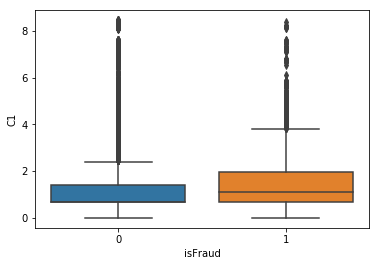

In [16]:
sns.boxplot(num_df.isFraud,y)

In [17]:
type(numeric_stats)

pandas.core.frame.DataFrame

In [18]:
numeric_stats['skew'].describe()

count    402.000000
mean      16.875334
std       29.737262
min      -94.179160
25%        3.021301
50%       10.955439
75%       22.823200
max      343.665535
Name: skew, dtype: float64

In [19]:
numeric_stats.loc[numeric_stats['std'] < 1]

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.058956,118108.0,0.035019,0.183828,0.0,0.000000,0.000000,0.000000,1.000000
C3,float64,13,0.000000,86.235515,118108.0,0.005630,0.143003,0.0,0.000000,0.000000,0.000000,22.000000
D9,float64,24,87.305686,-0.593648,14993.0,0.562215,0.316640,0.0,0.208333,0.666666,0.833333,0.958333
V1,float64,2,47.415924,-94.179160,62106.0,0.999887,0.010616,0.0,1.000000,1.000000,1.000000,1.000000
V2,float64,8,47.415924,7.007718,62106.0,1.046276,0.246806,0.0,1.000000,1.000000,1.000000,8.000000
V3,float64,9,47.415924,5.410629,62106.0,1.078302,0.323818,0.0,1.000000,1.000000,1.000000,8.000000
V4,float64,7,47.415924,-0.374807,62106.0,0.848404,0.441137,0.0,1.000000,1.000000,1.000000,6.000000
V5,float64,7,47.415924,0.250158,62106.0,0.877918,0.474999,0.0,1.000000,1.000000,1.000000,6.000000
V6,float64,9,47.415924,6.849592,62106.0,1.047419,0.247403,0.0,1.000000,1.000000,1.000000,9.000000
V7,float64,10,47.415924,5.435294,62106.0,1.074099,0.307986,0.0,1.000000,1.000000,1.000000,9.000000


        isFraud           y     log_y
57903         0    0.000000  0.000000
400901        0    0.000000  0.000000
235736        0    0.000000  0.000000
200779        0  168.800003  5.134621
226515        0  114.949997  4.753159


/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


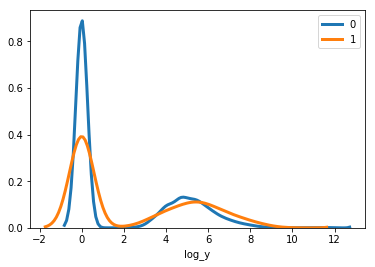

In [20]:
subset = num_df[['isFraud', 'V127']].copy()
subset.columns = ['isFraud', 'y']
subset['log_y'] = np.log(1 + subset['y'])
print(subset.head())

for isFraud in [0, 1]:
    # Draw the density plot
    sns.distplot(subset.loc[subset.isFraud == isFraud ,'log_y'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = isFraud)

In [21]:
def extract_data(c):
    df = num_df[['isFraud',c]].copy()
    df['var'] = c
    df.columns = ['isFraud', 'value', 'var']
    return df

def plot_log_density(*args, **kwargs):
    for isFraud in [0, 1]:
        idx = args[1] == isFraud
        this_data = np.log( 1 + args[0].loc[idx])
        sns.distplot(this_data, hist=False, kde = True,
                kde_kws={'linewidth':3}, label=isFraud)

#     sns.distplot(args[0])


In [22]:
idx = np.abs(numeric_stats['skew']) > 2.0

In [23]:
skewed_vars = numeric_stats.index[idx]

In [24]:
len(skewed_vars)

346

In [25]:
skewed_vars = list(set(skewed_vars) - set(['isFraud']))

In [26]:
nonskewed_vars = list(set(num_predictors) - set(skewed_vars) - set(['isFraud']))

In [27]:
len(nonskewed_vars)

56

In [28]:
print(nonskewed_vars)


['V11', 'V91', 'V194', 'id_02', 'V82', 'V76', 'V50', 'V29', 'V30', 'id_25', 'D15', 'V90', 'TransactionDT', 'V35', 'V67', 'V19', 'V75', 'D4', 'V36', 'V4', 'id_13', 'V49', 'id_17', 'id_32', 'V12', 'V62', 'D9', 'V61', 'V10', 'V54', 'card2', 'id_19', 'D10', 'id_07', 'D1', 'id_21', 'V83', 'V48', 'D11', 'V13', 'card1', 'V20', 'id_03', 'id_26', 'V69', 'card5', 'id_20', 'D2', 'V5', 'V70', 'V53', 'V66', 'addr1', 'id_24', 'V260', 'id_08']


In [29]:
len(skewed_vars)

345

In [30]:
skewed_vars = sorted(skewed_vars)
nonskewed_vars = sorted(nonskewed_vars)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


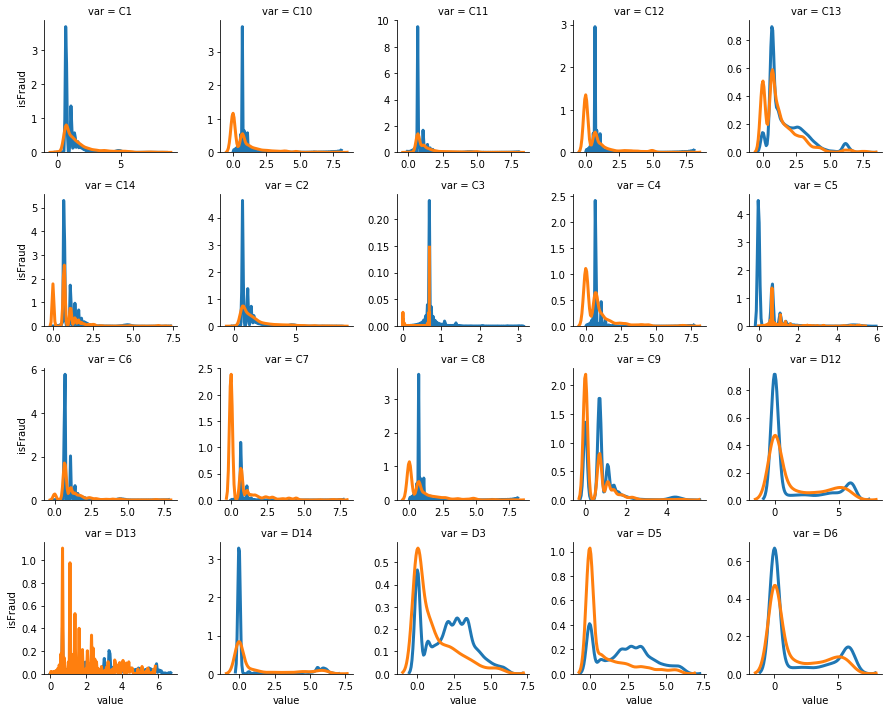

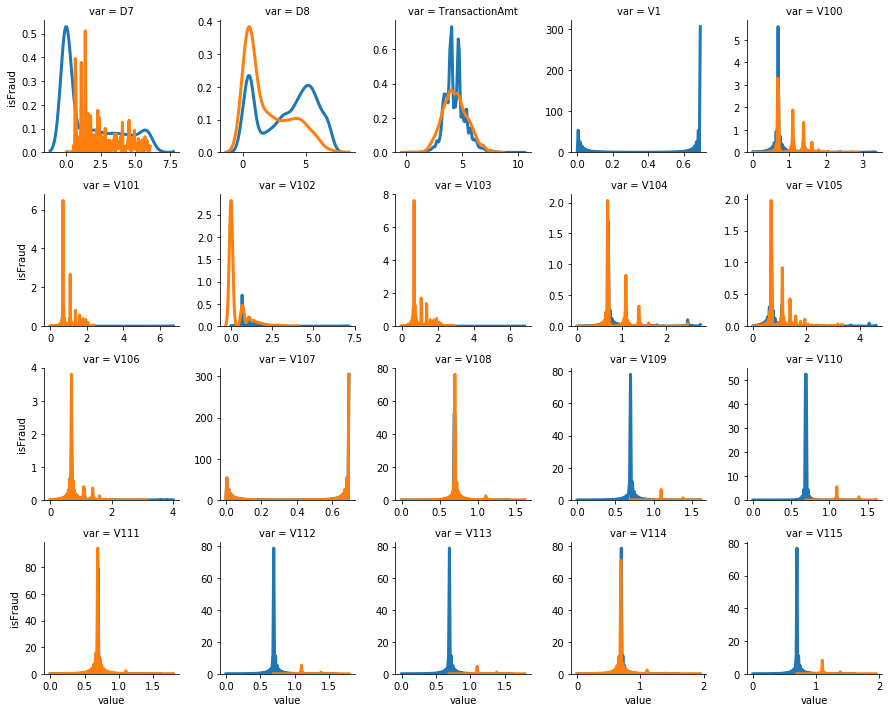

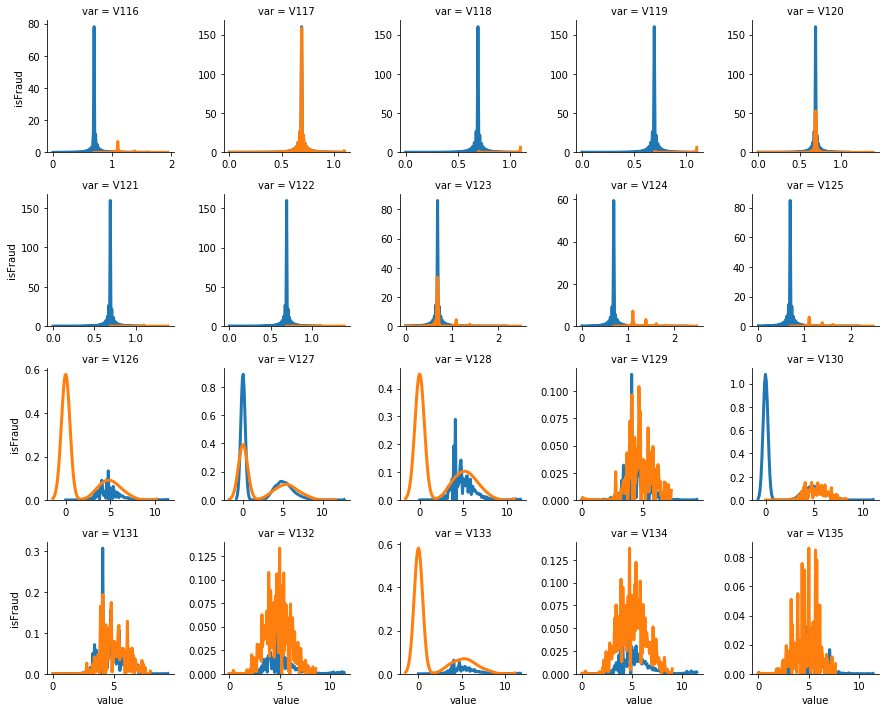

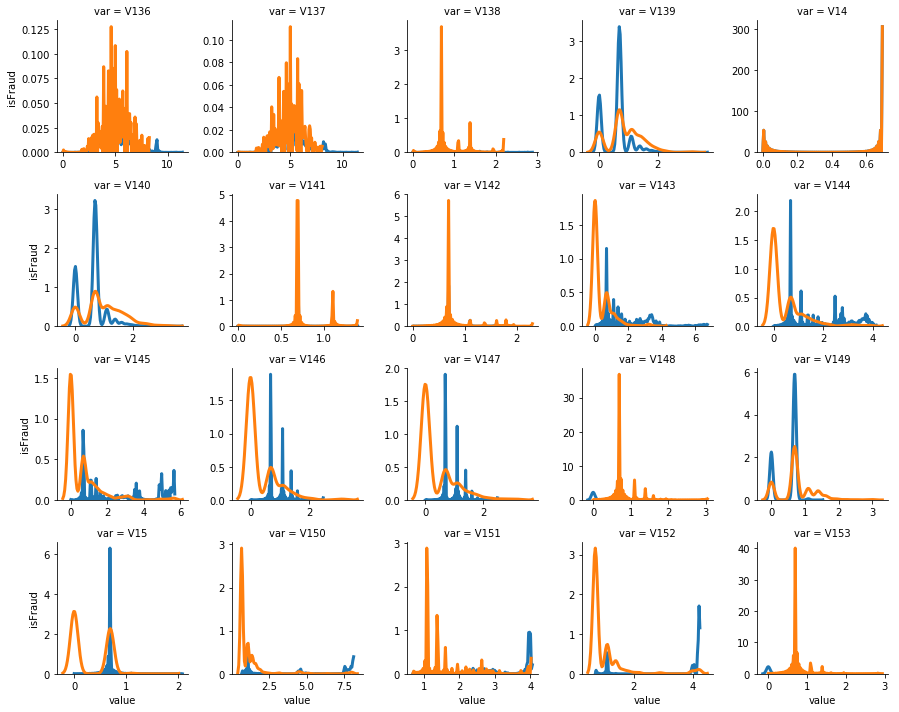

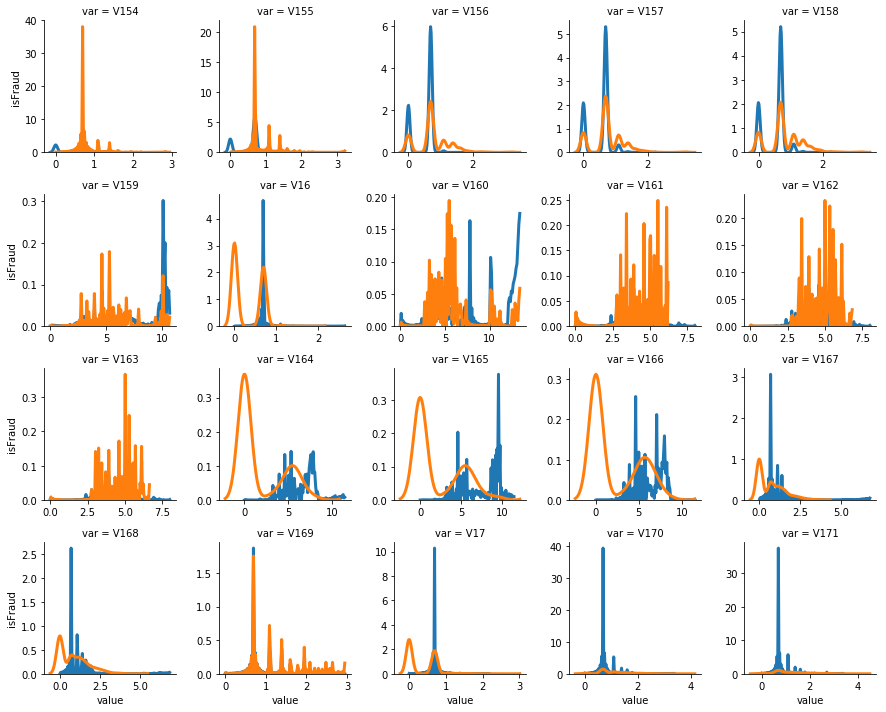

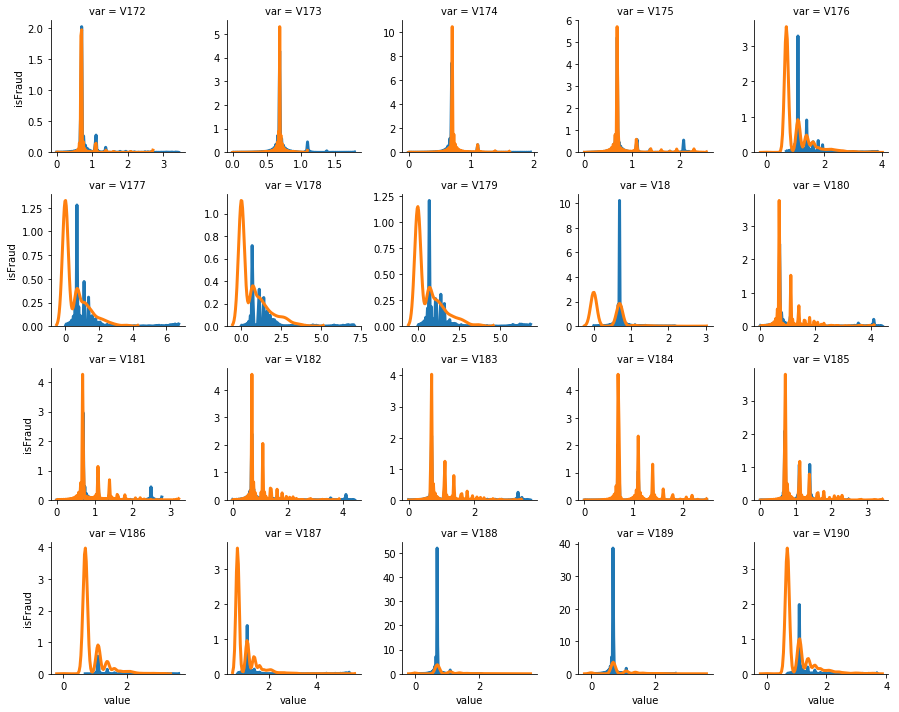

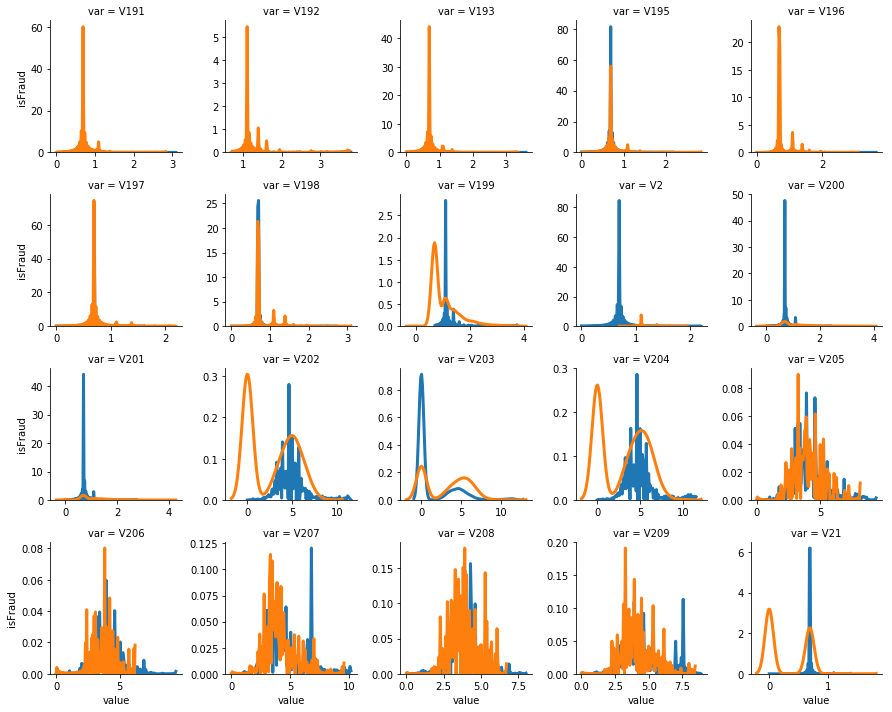

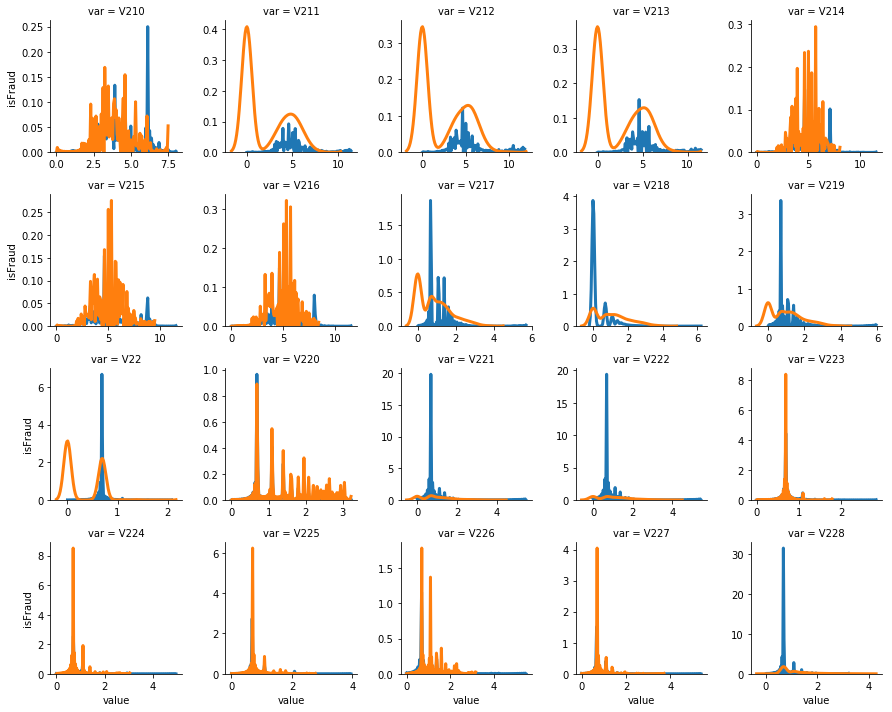

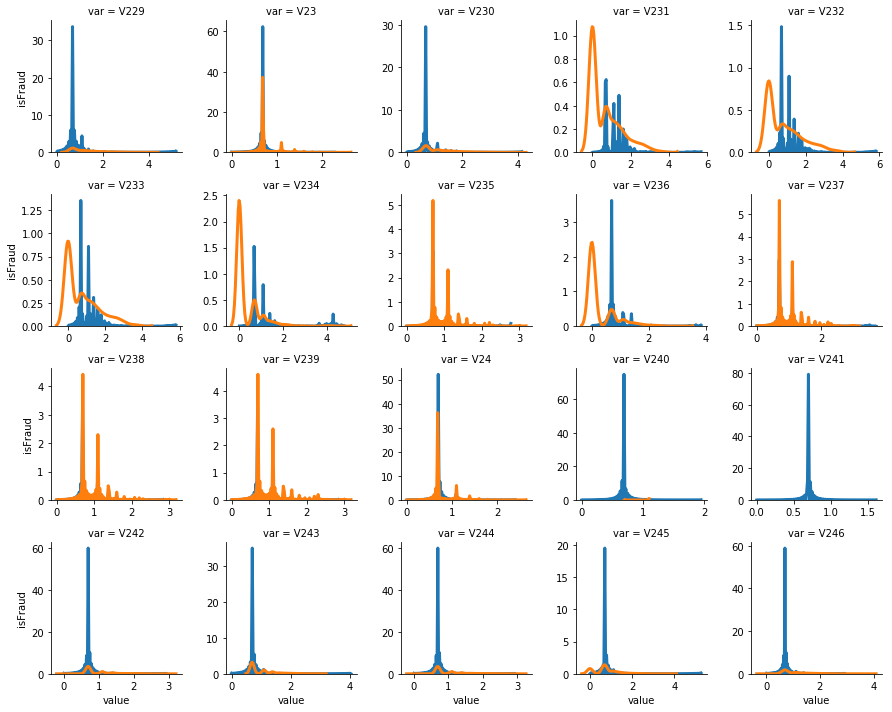

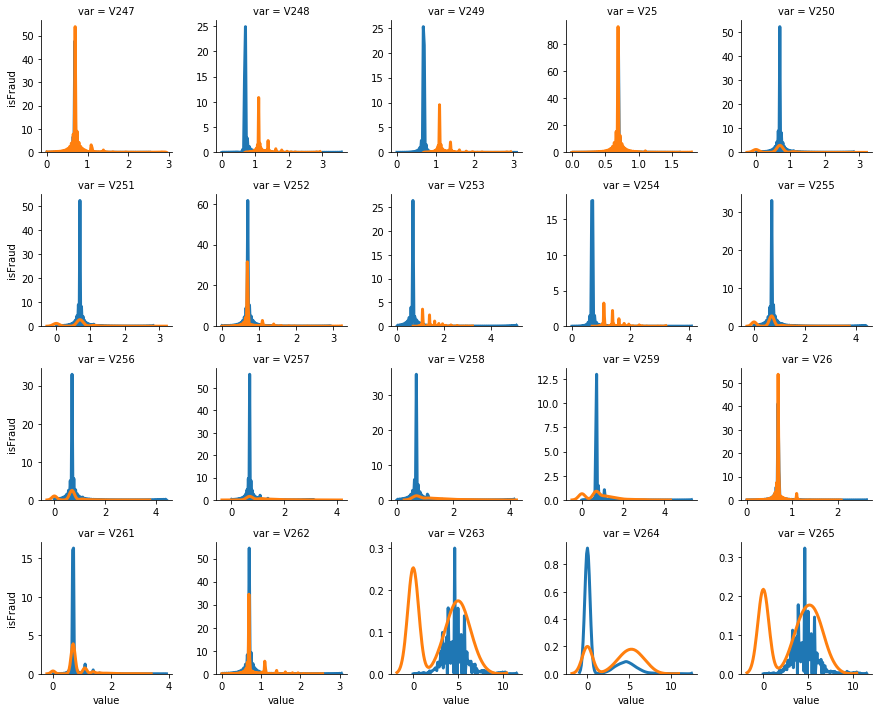

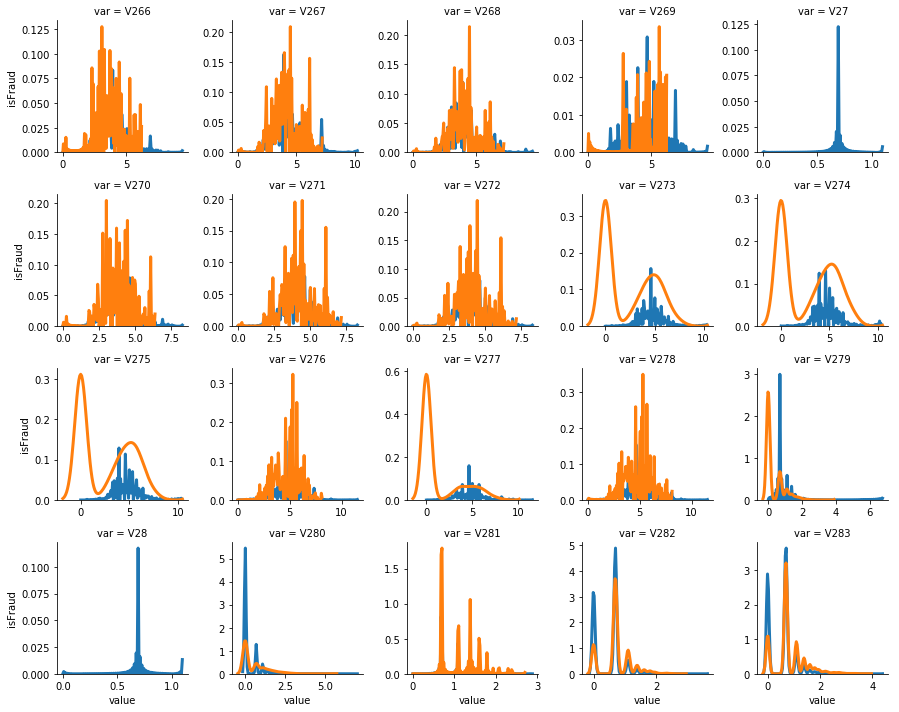

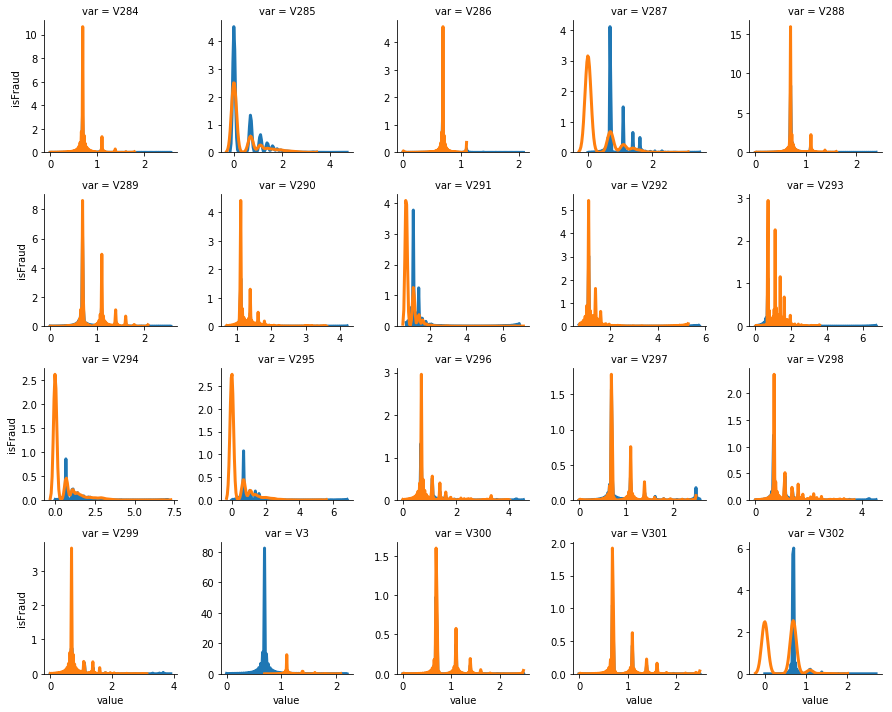

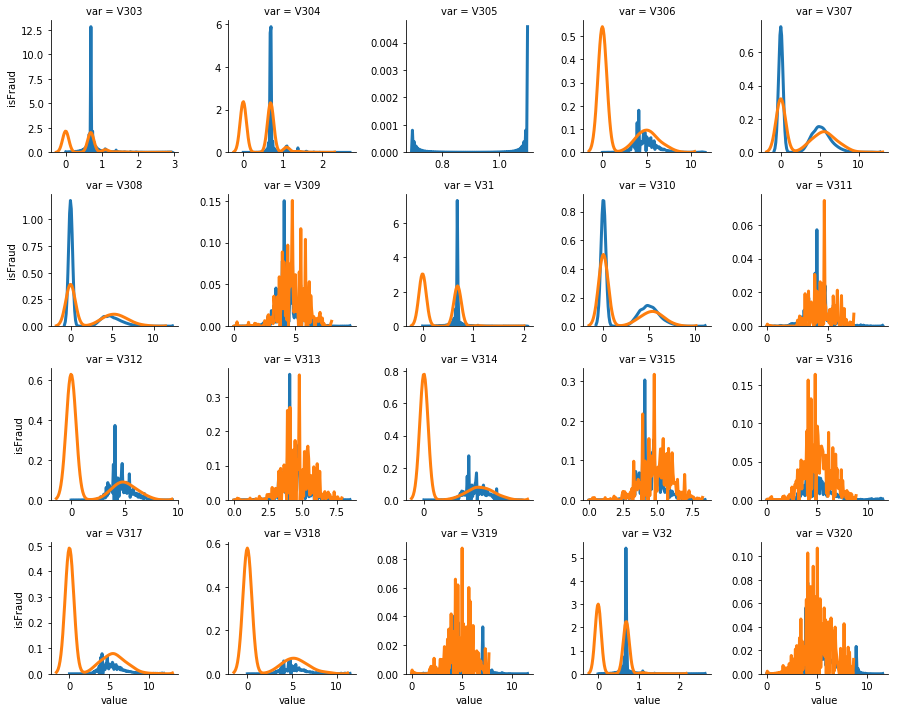

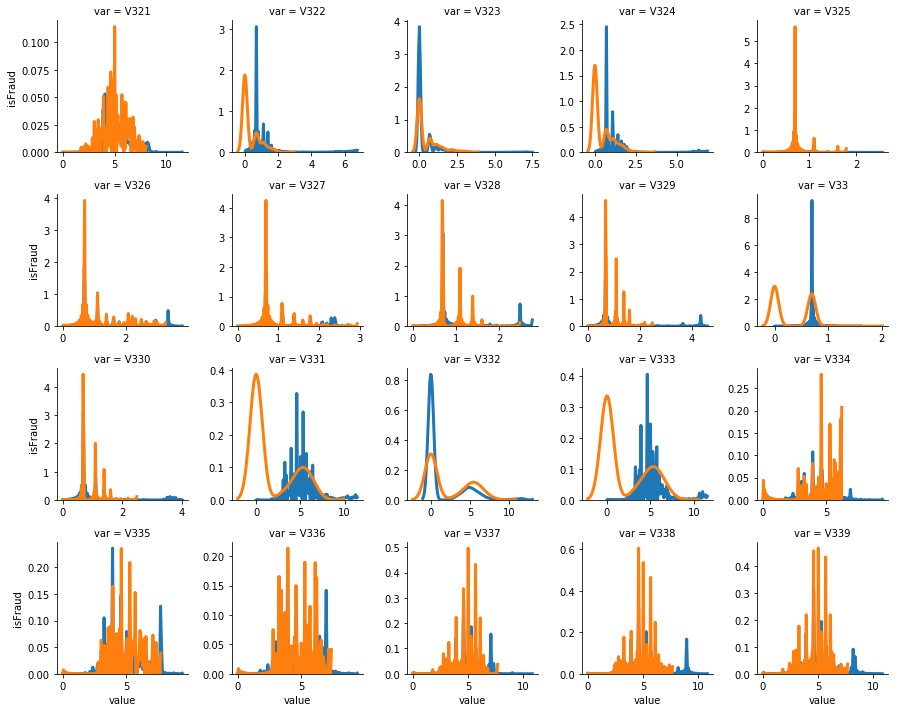

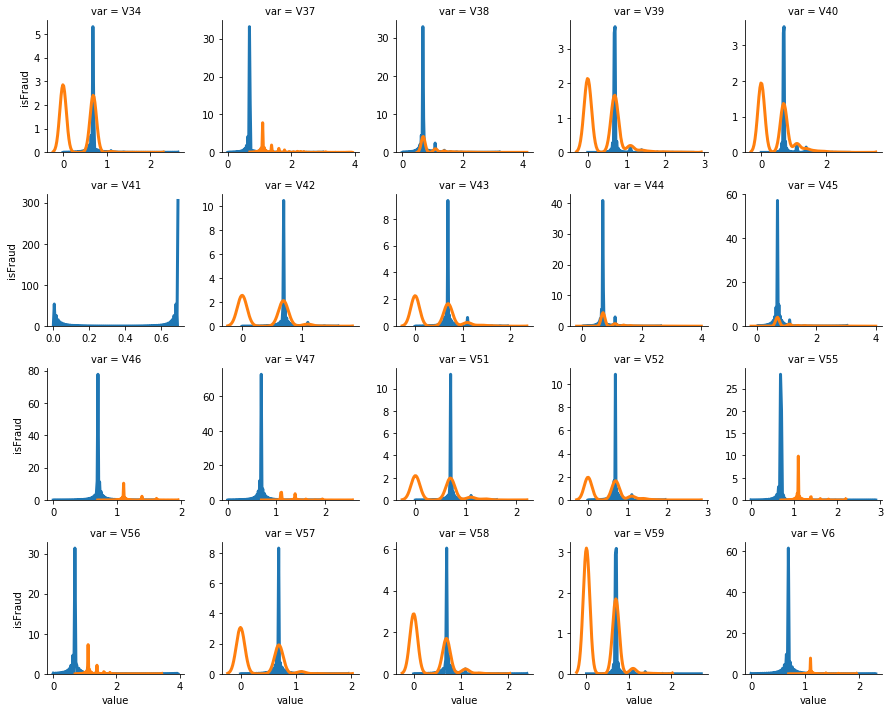

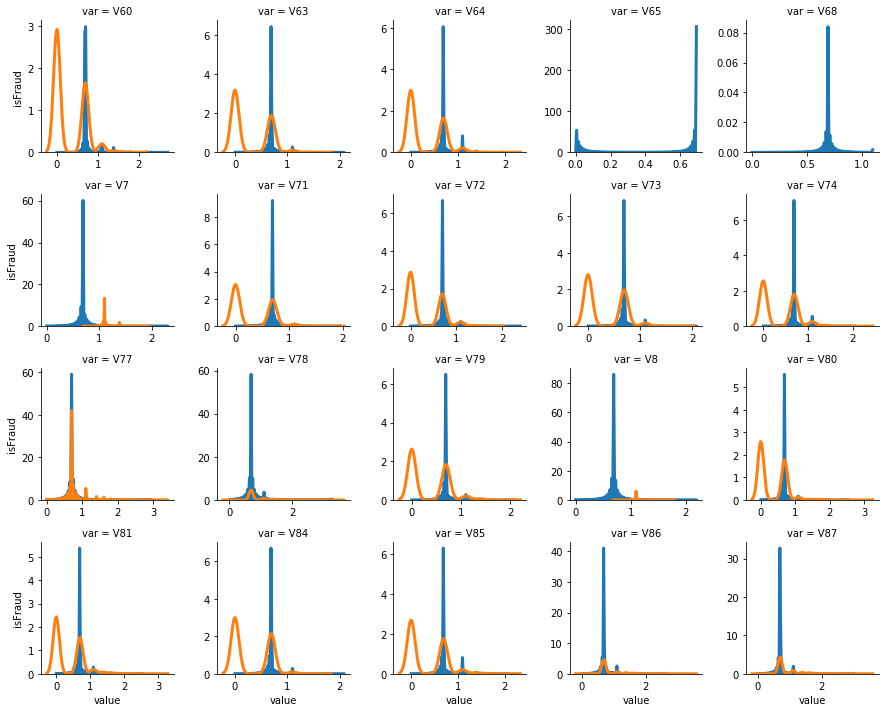

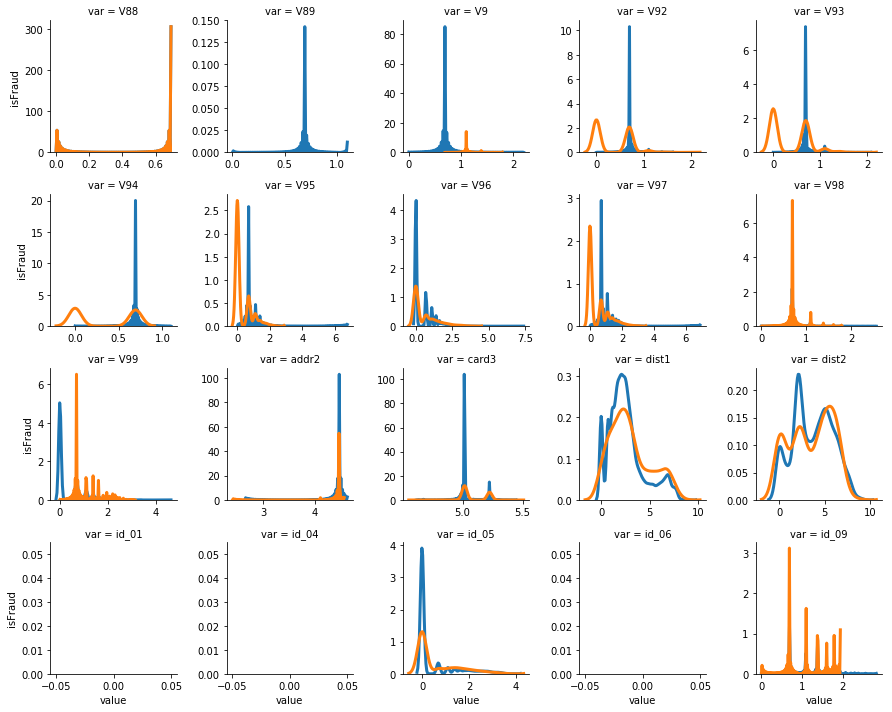

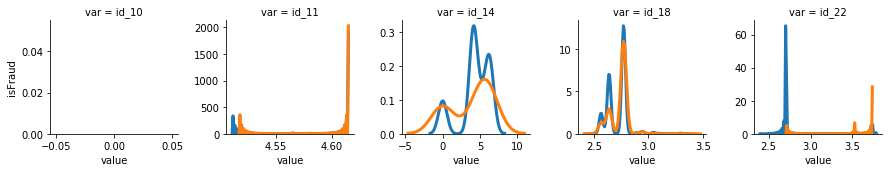

In [31]:
step_size = 20
graph_set=0
os.mkdir(os.path.join(tmpdir,'graphs_skewed'))
for i in range(0,len(skewed_vars),step_size):
    df = pd.concat([extract_data(c) for c in skewed_vars[i:(i+step_size)]], axis=0, ignore_index=True)
    g = sns.FacetGrid(df, col="var", col_wrap=5, height=2.5, sharex=False, sharey=False)
    g = g.map(plot_log_density, "value", "isFraud")
    graph_set += 1
    g.savefig(os.path.join(tmpdir,'graphs_skewed','graph_set'+str(graph_set)+'.png'))

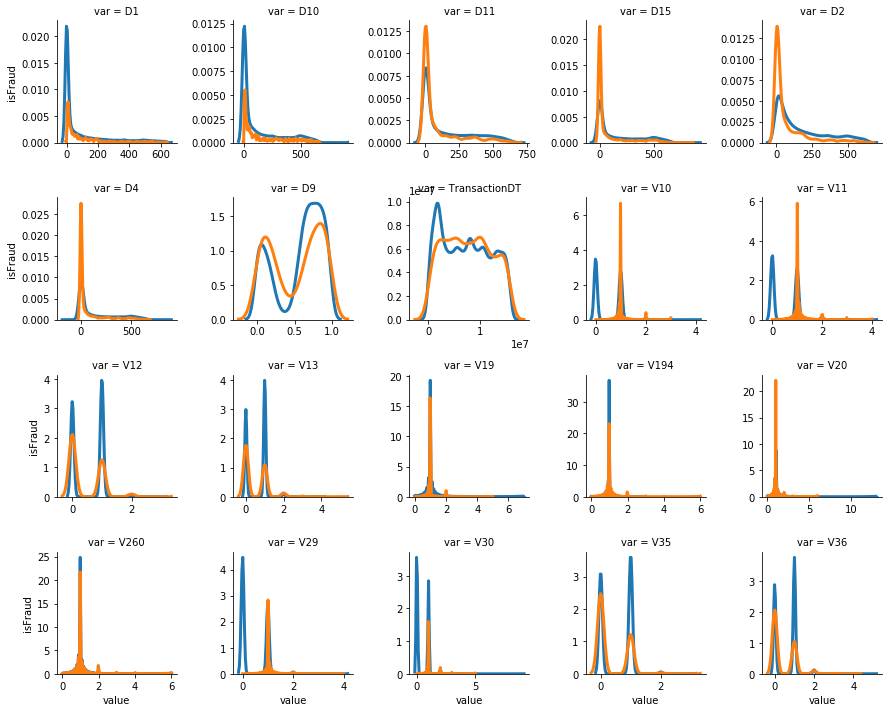

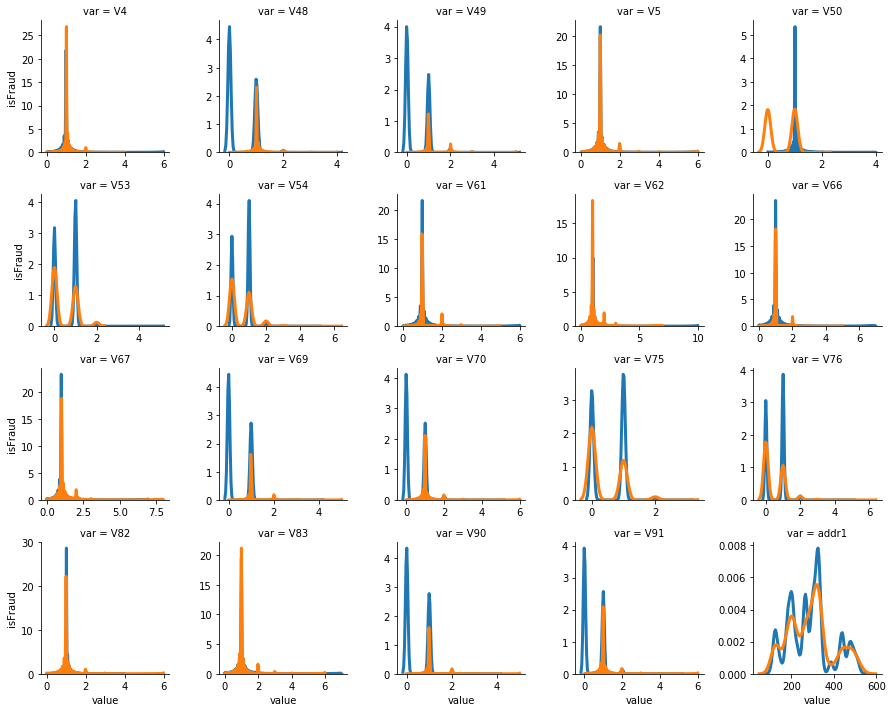

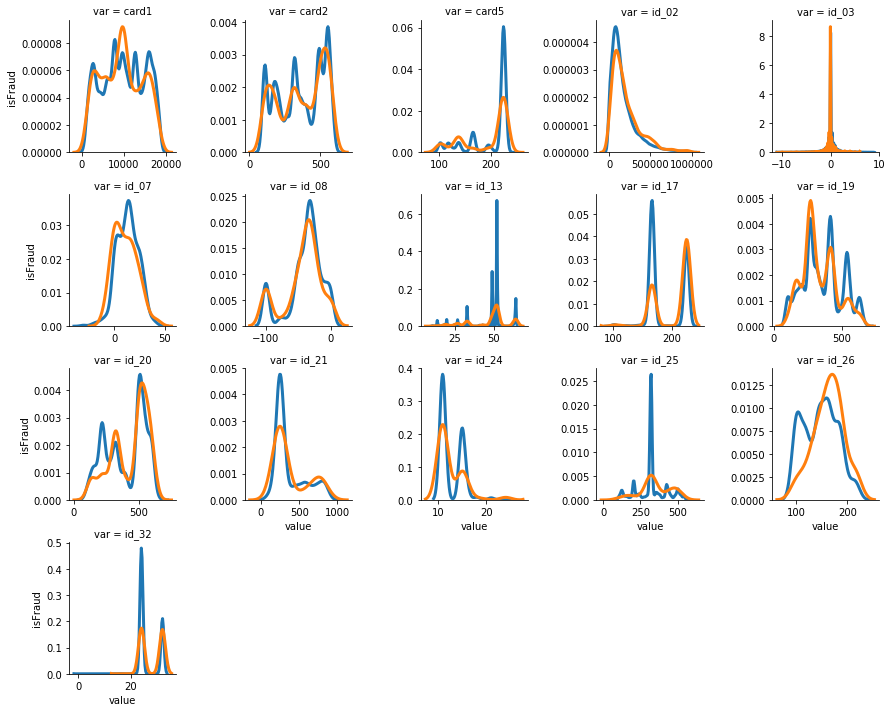

In [32]:
def plot_density(*args, **kwargs):
    for isFraud in [0, 1]:
        idx = args[1] == isFraud
        this_data = args[0].loc[idx]
        sns.distplot(this_data, hist=False, kde = True,
                kde_kws={'linewidth':3}, label=isFraud)

step_size = 20
graph_set=0
os.mkdir(os.path.join(tmpdir,'graphs_nonskewed'))
for i in range(0,len(nonskewed_vars),step_size):
    df = pd.concat([extract_data(c) for c in nonskewed_vars[i:(i+step_size)]], axis=0, ignore_index=True)
    g = sns.FacetGrid(df, col="var", col_wrap=5, height=2.5, sharex=False, sharey=False)
    g = g.map(plot_density, "value", "isFraud")
    graph_set += 1
    g.savefig(os.path.join(tmpdir,'graphs_nonskewed','graph_set'+str(graph_set)+'.png'))

In [33]:
num_df.shape

(118108, 402)

In [34]:
skewed_vars[:5]

['C1', 'C10', 'C11', 'C12', 'C13']

## bin skewed data

In [35]:
my_df = num_df[['isFraud','V127']].sample(1000).copy()
my_df['log_V127'] = np.log(1 + my_df['V127'])


my_df['binned'] = pd.cut(my_df['log_V127'],5).astype(str)

my_df['binned'].value_counts().sort_index()

my_df.groupby('binned')['isFraud'].mean()

binned
(-0.0117, 2.333]    0.045669
(2.333, 4.666]      0.034188
(4.666, 7.0]        0.046296
(7.0, 9.333]        0.000000
(9.333, 11.666]     0.000000
nan                 0.000000
Name: isFraud, dtype: float64

In [36]:
pd.crosstab(my_df.isFraud, my_df.binned)

binned,"(-0.0117, 2.333]","(2.333, 4.666]","(4.666, 7.0]","(7.0, 9.333]","(9.333, 11.666]",nan
isFraud,,,,,,
0,606,113,206,28,3,1
1,29,4,10,0,0,0


In [37]:
simulate_chi_square(pd.crosstab(my_df.isFraud, my_df.binned).values)

(1.8255825747611814,
 0.717,
 array([[6.07695e+02, 1.11969e+02, 2.06712e+02, 2.67960e+01, 2.87100e+00,
         9.57000e-01],
        [2.73050e+01, 5.03100e+00, 9.28800e+00, 1.20400e+00, 1.29000e-01,
         4.30000e-02]]))

In [38]:
stats.chi2_contingency(pd.crosstab(my_df.isFraud, my_df.binned).values)

(1.8255825747611811,
 0.872714053161715,
 5,
 array([[6.07695e+02, 1.11969e+02, 2.06712e+02, 2.67960e+01, 2.87100e+00,
         9.57000e-01],
        [2.73050e+01, 5.03100e+00, 9.28800e+00, 1.20400e+00, 1.29000e-01,
         4.30000e-02]]))

In [39]:
var = 'V14'
my_df = num_df[['isFraud',var]].sample(1000).copy()
my_df['log_'+var] = np.log(1 + my_df[var])


my_df['binned'] = pd.cut(my_df['log_'+var],5).astype(str)

my_df['binned'].value_counts().sort_index()

my_df.groupby('binned')['isFraud'].mean()

binned
(-0.000693, 0.139]    0.000000
(0.555, 0.693]        0.038417
nan                   0.071429
Name: isFraud, dtype: float64

In [40]:
pd.crosstab(my_df.isFraud, my_df.binned)

binned,"(-0.000693, 0.139]","(0.555, 0.693]",nan
isFraud,,,
0,1,826,130
1,0,33,10


In [41]:
simulate_chi_square(pd.crosstab(my_df.isFraud, my_df.binned).values)

(3.2329449024978114, 0.12, array([[9.57000e-01, 8.22063e+02, 1.33980e+02],
        [4.30000e-02, 3.69370e+01, 6.02000e+00]]))

In [42]:
stats.chi2_contingency(pd.crosstab(my_df.isFraud, my_df.binned).values)

(3.232944902497813,
 0.19859802912764,
 2,
 array([[9.57000e-01, 8.22063e+02, 1.33980e+02],
        [4.30000e-02, 3.69370e+01, 6.02000e+00]]))

In [43]:
def test_chisq(c, skewed=True):
    try:
        my_df = extract_data(c)
        np.random.seed(13)
        my_df = num_df[['isFraud',c]].sample(1000).copy()
        if skewed:
            my_df['log_'+c] = np.log(1 + my_df[c])
            my_df['binned'] = pd.cut(my_df['log_'+c],5).astype(str)
        else:
            my_df['binned'] = pd.cut(my_df[c],5).astype(str)
            
        chisq_score, p_value, _ = simulate_chi_square(pd.crosstab(my_df.isFraud, my_df.binned).values)
    except:
        chisq_score = np.nan
        p_value = np.nan
    
    return {'var':c, 'chisq_score': chisq_score, 'p_value': p_value}
    
chisq_df_skewed = pd.DataFrame([test_chisq(c) for c in skewed_vars])

chisq_df_skewed.sort_values('p_value', ascending=False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


,chisq_score,p_value,var
273,1.084093,0.850,V333
272,1.103965,0.845,V332
13,1.554132,0.808,C9
266,0.895098,0.780,V327
276,0.895098,0.780,V336
275,1.015949,0.766,V335
64,0.017178,0.764,V14
215,0.017178,0.764,V28
204,0.017178,0.764,V27
5,2.008212,0.745,C14


In [44]:
chisq_df_skewed.loc[chisq_df_skewed['var'] == 'V276']

,chisq_score,p_value,var
211,20.035028,0.056,V276


In [45]:
chisq_df_skewed.shape

(345, 3)

In [46]:
chisq_df_skewed.loc[chisq_df_skewed.p_value < 0.05/chisq_df_skewed.shape[0]]

,chisq_score,p_value,var
3,112.113050,0.0,C12
8,77.502339,0.0,C4
11,100.144246,0.0,C7
12,67.491149,0.0,C8
17,23.255484,0.0,D3
18,45.625779,0.0,D5
20,88.591195,0.0,D7
21,104.191664,0.0,D8
23,14.901210,0.0,V1
25,60.887948,0.0,V101


In [47]:
chisq_df_nonskewed = pd.DataFrame([test_chisq(c, skewed=False) for c in nonskewed_vars])

chisq_df_nonskewed.sort_values('p_value', ascending=False)

,chisq_score,p_value,var
35,0.625786,0.930,V82
3,1.406696,0.857,D15
17,0.616206,0.801,V30
7,2.035397,0.723,TransactionDT
1,2.551721,0.653,D10
55,1.573898,0.518,id_32
40,3.552463,0.480,card1
5,4.452976,0.467,D4
4,6.101650,0.288,D2
0,4.943959,0.266,D1


In [48]:
chisq_df_nonskewed.loc[chisq_df_nonskewed.p_value < 0.05/chisq_df_nonskewed.shape[0]]

,chisq_score,p_value,var
6,42.783787,0.0,D9
13,46.801745,0.0,V194
24,26.458275,0.0,V50
39,41.219874,0.0,addr1


## Record results in mlflow

In [49]:
%%javascript
IPython.notebook.kernel.execute(`notebookName = '${IPython.notebook.notebook_name}'`);

<IPython.core.display.Javascript object>

In [50]:
notebookName

'eda_numeric_statistics.ipynb'

In [52]:
%%capture --no-stderr cap1

print(chisq_df_skewed.sort_values('p_value', ascending=False))

with open(os.path.join(tmpdir,'skewed_full_chisq_analysis.txt'), 'w') as f:
    f.write(cap1.stdout)

In [54]:
%%capture --no-stderr cap2

# with Bonfceroni correction
print(chisq_df_skewed.loc[chisq_df_skewed['p_value'] < (0.05/34)].sort_values('p_value', ascending=False))

with open(os.path.join(tmpdir,'skewed_significant_chisq_analysis.txt'), 'w') as f:
    f.write(cap2.stdout)

In [56]:
%%capture --no-stderr cap3

print(chisq_df_nonskewed.sort_values('p_value', ascending=False))

with open(os.path.join(tmpdir,'nonskewed_full_chisq_analysis.txt'), 'w') as f:
    f.write(cap3.stdout)

In [58]:
%%capture --no-stderr cap4

# with Bonfceroni correction
print(chisq_df_nonskewed.loc[chisq_df_nonskewed['p_value'] < (0.05/34)].sort_values('p_value', ascending=False))

with open(os.path.join(tmpdir,'nonskewed_significant_chisq_analysis.txt'), 'w') as f:
    f.write(cap4.stdout)

In [59]:
chisq_df_skewed.to_pickle(os.path.join(tmpdir,'chisq_df_skewed.pkl'))

In [60]:
chisq_df_nonskewed.to_pickle(os.path.join(tmpdir,'chisq_df_nonskewed.pkl'))

In [61]:
# save sample as mlflow artifact
experiment_id = mlflow.set_experiment('eda')

#%%
with mlflow.start_run(experiment_id=experiment_id, run_name='num_var_analysis'):
    mlflow.log_param('notebook_name',notebookName)
    
    mlflow.log_artifact(os.path.join(tmpdir,'skewed_full_chisq_analysis.txt'))
    mlflow.log_artifact(os.path.join(tmpdir,'skewed_significant_chisq_analysis.txt'))
    for f in os.listdir(os.path.join(tmpdir,'graphs_skewed')):
        mlflow.log_artifact(os.path.join(tmpdir,'graphs_skewed',f),'graphs_skewed')
    mlflow.log_artifact(os.path.join(tmpdir,'chisq_df_skewed.pkl'))
    
    mlflow.log_artifact(os.path.join(tmpdir,'nonskewed_full_chisq_analysis.txt'))
    mlflow.log_artifact(os.path.join(tmpdir,'nonskewed_significant_chisq_analysis.txt'))
    for f in os.listdir(os.path.join(tmpdir,'graphs_nonskewed')):
        mlflow.log_artifact(os.path.join(tmpdir,'graphs_nonskewed',f),'graphs_nonskewed')
    mlflow.log_artifact(os.path.join(tmpdir,'chisq_df_nonskewed.pkl'))

In [62]:
#%%
# clean up temp directory
shutil.rmtree(tmpdir)

In [63]:
notebookName

'eda_numeric_statistics.ipynb'